<a href="https://colab.research.google.com/github/ckraju/Reinforcement-Learning/blob/main/1_Reinforcement-Learning-Basics_ML18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning Basics

**Reinforcement learning** (RL) is a category of machine learning and it is best understood as If we have an **agent** that interacts with an **environment** such that it can observe the environment state and perform **actions**. Upon doing actions, the environment state changes into a new state and the agent receives a **reward** (or penalty). Reinforcement learning aims at making this agent learn from his experience of interactions with the environment so that it chooses the best actions that maximize the sum of rewards it receives from the environment.
<img src="https://github.com/ckraju/Reinforcement-Learning/blob/main/images/rl_diagram.png?raw=1">

Mathematically, RL is described using a framework called **Markov Decision Process** (MDP). Formally, MDP is defined by a tuple of five items $<S, A, P, R, \gamma>$, which are:
- $S$:  Set of observations. The agent observes the environment state as one item of this set.
- $A$: Set of actions. The set of actions the agent can choose one from to interact with the environment.
- $P$: $P(s'| s, a)$ transition probability matrix. This models what next state $s'$ will be after the agent makes the action a while being in the current state $s$.
- $R$: $P(r | s, a)$ reward model that models what reward the agent will receive when it performs action $a$ when it is in state $s$.
- $\gamma$: discount factor. This factor is a numerical value between 0 and 1 that represents the relative importance between immediate and future rewards. 

The goal of the RL is to solve the MDP by finding *optimal policy* which means finding the sequence of action it can make to maximize the total received reward. The two fundamental method for solving MDP's are **value iteration** and **policy iteration** algorithms. Both value-iteration and policy-iteration assume that the agent knows the MDP model of the world (i.e. the agent knows the state-transition and reward probability functions). Therefore, they can be used by the agent to (offline) plan its actions given knowledge about the environment before interacting with it. We will discuss these two approaches in this notebook. 

### MDP
We saw that MDP consists of a tuple of 5 elements, $<S, A, P, R, \gamma>$.  The way by which the agent chooses which action to perform is named the agent **policy** which is a function that takes the current environment state to return an action. The policy is often denoted by the symbol $\pi$.
$$\pi(s) : \mathbb{S} \rightarrow \mathbb{A}$$

Let’s now differentiate between two types of environments.

 - **Deterministic environment**: deterministic environment means that both state transition model and reward model are deterministic functions. If the agent while in a given state repeats a given action, it will always go the same next state and receives the same reward value.
 
- **Stochastic environment**: In a stochastic environment there is uncertainty about the actions effect. When the agent repeats doing the same action in a given state, the new state and received reward may not be the same each time. For example, a robot which tries to move forward but because of the imperfection in the robot operation or other factors in the environment (e.g. slippery floor), sometimes the action forward will make it move forward but in sometimes, it will move to left or right.

Deterministic environments are easier to solve because the agent knows how to plan its actions with no-uncertainty given the environment MDP. Possibly, the environment can be modeled in as a graph where each state is a node and edges represent transition actions from one state to another and edge weights are received rewards. Then, the agent can use a graph search algorithm such as A* to _find the path with maximum total reward form the initial state_.

The goal of the agent is to pick the best policy that will maximize the total rewards received from the environment. 

Assume that environment is initially at state $s_0$. At time 0: Agent observes the environment state $s_0$ and picks an action $a_0$, then upon performing its action, environment state becomes $s_1$ and the agent receives a reward $r_1$. At time 1: Agent observes current state $s_1$ and picks an action $a_1$ , then upon acting its action, environment state becomes $s_2$ and it receives a reward $r_2$. So the **total reward** received by the agent in response to the actions selected by its policy is going to be: 
$$\text{total_reward} = r_1 + r_2 + \dots$$.

However, it is common to use a discount factor to give higher weight to near rewards received near than rewards received further in the future.
$$\text{total_discounted_reward} = r_1 + \gamma\ r_2 + \gamma^{2}\ r_3 + \dots = \sum_{i=1}^{T} \gamma^{i-1}\ r_i$$
where `T` is the horizon (episode length) which can be infinity if there is the maximum length for the episode.

The **value function** $V(s)$ represent how good is a state for an agent to be in. It is equal to expected total reward for an agent starting from state $s$. The value function depends on the policy $\pi$ by which the agent picks actions to perform.
$$V^{\pi}(s) = \mathbb{E}[\sum_{i=1}^T \gamma^{i-1} r_i], \forall s \in \mathbb{S}$$

Among all possible value-functions, there exists an optimal value function that has a higher value than other functions for all states.
$$V^{*}(s) = \max_{\pi} V^{\pi}(s), \forall s \in \mathbb{S}$$

The optimal policy $\pi^{*}$ is the policy that corresponds to optimal value function.
$$\pi^{*} = \arg\max_{\pi} V^{\pi}(s), \forall s \in \mathbb{S}$$

In addition to the state value-function, for convenience RL algorithms introduce another function which is the state-action pair **Q function**. Q is a function of a state-action pair and returns a real value.
$$\mathbf{Q}:\mathbb{S} \times \mathbb{A} \rightarrow \mathbb{R}$$

The optimal Q-function $Q^{*}(s, a)$ means the expected total reward received by an agent starting in sand picks action $a$, then will behave optimally afterward. There, $Q^{*}(s, a)$ is an indication of how good it is for an agent to pick action a while being in state $s$.

Since $V^{*}(s)$ is the maximum expected total reward when starting from state $a$, it will be the maximum of $Q^{*}(s, a)$over all possible actions. Therefore, the relationship between Q*(s, a) and V*(s) is easily obtained as:
$$V^{*}(s) = \max_{a} Q^{*}(s,a), \forall s \in \mathbb{S}$$

and If we know the optimal Q-function Q*(s, a) , the optimal policy can be easily extracted by choosing the action a that gives maximum Q*(s, a) for state s.

Now, given these, we can introduce **Bellman equations**. Bellman equation using dynamic programming paradigm provides a recursive definition for the optimal Q-function. The $Q^{*}(s, a)$ is equal to the summation of immediate reward after performing action $a$ while in state $s$ and the discounted expected future reward after the transition to a next state $s'$.
$$Q^{*}(s,a) = R(s,a) + \gamma \mathbb{E}_{s'}[V^{*}(s')]$$
$$Q^{*}(s,a) = R(s,a) + \gamma \sum_{s' \in \mathbb{S}} p(s'|s,a) V^{*}(s')$$

Since $V^{*}(S) = \max_{a} Q^{*}(s, a)$, we have
$$V^{*}(S) = \max_{a} \Big( R(s,a) + \gamma \sum_{s' \in \mathbb{S}} p(s'|s, a)V^{*}(s,a) \Big)$$

Value-iteration and policy iteration rely on these equations to compute the optimal value function.

First, let us take a look at our environment.

In [1]:
!wget https://raw.githubusercontent.com/ckraju/Reinforcement-Learning/main/frozenlake.py
!wget https://raw.githubusercontent.com/ckraju/Reinforcement-Learning/main/plot_utils.py



--2021-08-01 06:42:18--  https://raw.githubusercontent.com/ckraju/Reinforcement-Learning/main/frozenlake.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4521 (4.4K) [text/plain]
Saving to: ‘frozenlake.py’

frozenlake.py       100%[===================>]   4.42K  --.-KB/s    in 0s      

2021-08-01 06:42:18 (51.6 MB/s) - ‘frozenlake.py’ saved [4521/4521]

--2021-08-01 06:42:18--  https://raw.githubusercontent.com/ckraju/Reinforcement-Learning/main/plot_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 502 [text/plain]
Savi

In [2]:
# Imports
import numpy as np
import copy

from frozenlake import FrozenLakeEnv
from plot_utils import plot_values

## 0. Introduction to environment - Frozen Lake

For this lab we will solve the [Frozen Lake](https://gym.openai.com/envs/FrozenLake-v0) environment from [OpenAI gym](https://gym.openai.com/). 
<img src="https://github.com/ckraju/Reinforcement-Learning/blob/main/images/frozen_lake.png?raw=1" width=50%>

The FrozenLake environment consists of a 4x4 grid of blocks, each one either being the start block, the goal block, a safe frozen block, or a dangerous hole as shown below:
```
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
```

The objective is to have an agent learn to navigate from the start to the goal without moving onto a hole. At any given time the agent can choose to move either up, down, left, or right. The catch is that there is a wind which occasionally blows the agent onto a space they didn’t choose. As such, perfect performance every time is impossible, but learning to avoid the holes and reach the goal are certainly still doable. The reward at every step is 0, except for entering the goal, which provides a reward of 1.

Thus, $\mathcal{S}^+ = \{0, 1, \ldots, 15\}$, and $\mathcal{A} = \{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
env = FrozenLakeEnv()

In [4]:
# print the state space and action space
print(env.observation_space)
print(env.action_space)

# print the total number of states and actions
print(env.nS)
print(env.nA)

Discrete(16)
Discrete(4)
16
4


Typical solutions via dynamic programming in RL assumes that the agent has full knowledge of the MDP. Therefore, the `frozenlake.py` file is ammended to make the one-step dynamics accessible to the agent.  

Execute the code cell below to return the one-step dynamics corresponding to a particular state and action.  In particular, `env.P[1][0]` returns the the probability of each possible reward and next state, if the agent is in state 1 of the gridworld and decides to go left.

In [5]:
env.P[1][0]

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]

Each entry takes the form 
```
prob, next_state, reward, done
```
where: 
- `prob` details the conditional probability of the corresponding (`next_state`, `reward`) pair, and
- `done` is `True` if the `next_state` is a terminal state, and otherwise `False`.

Thus, we can interpret `env.P[1][0]` as follows:
$$
\mathbb{P}(S_{t+1}=s',R_{t+1}=r|S_t=1,A_t=0) = \begin{cases}
               \frac{1}{3} \text{ if } s'=1, r=0\\
               \frac{1}{3} \text{ if } s'=0, r=0\\
               \frac{1}{3} \text{ if } s'=5, r=0\\
               0 \text{ else}
            \end{cases}
$$

To understand the value of `env.P[1][0]`, note that when you create a FrozenLake environment, it takes as an (optional) argument `is_slippery`, which defaults to `True`.  

To see this, change the first line in the notebook from `env = FrozenLakeEnv()` to `env = FrozenLakeEnv(is_slippery=False)`.  Then, when you check `env.P[1][0]`, it should look like what you expect (i.e., `env.P[1][0] = [(1.0, 0, 0.0, False)]`).

The default value for the `is_slippery` argument is `True`.  In the event that `is_slippery=True`, you see that this can result in the agent moving in a direction that it did not intend (where the idea is that the ground is *slippery*, and so the agent can slide to a location other than the one it wanted).

Feel free to change the code cell above to explore how the environment behaves in response to other (state, action) pairs.  

Before proceeding to the next part, make sure that you set `is_slippery=True`, so that your implementations below will work with the slippery environment!

### Part 1: Iterative Policy Evaluation

In this section, you will write your own implementation of iterative policy evaluation.

Your algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s` under the input policy.

See the code below,

In [6]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s]-Vs))
            V[s] = Vs
        if delta < theta:
            break
    return V

We will evaluate the equiprobable random policy $\pi$, where $\pi(a|s) = \frac{1}{|\mathcal{A}(s)|}$ for all $s\in\mathcal{S}$ and $a\in\mathcal{A}(s)$.  

Use the code cell below to specify this policy in the variable `random_policy`. In this problem, we have 16 states and 4 possible moves. As a result, there exist $4^{16}=4294967296$ possible policies. Of course, it is not feasible to evaluate all of them, but we can generate a random set of solutions and select the best among them.

In [7]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

Run the next code cell to evaluate the equiprobable random policy and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

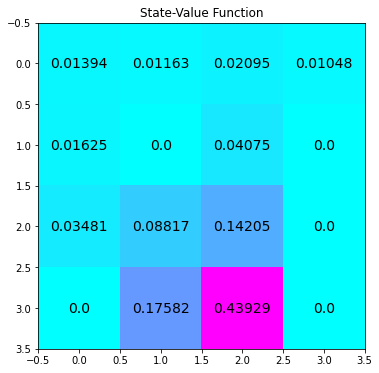

In [8]:
# evaluate the policy 
V = policy_evaluation(env, random_policy)

plot_values(V)

### Part 2: Obtain $q_\pi$ from $v_\pi$

In this section, we will see a function that takes the state-value function estimate as input, along with some state $s\in\mathcal{S}$.  It returns the **row in the action-value function** corresponding to the input state $s\in\mathcal{S}$.  That is, the function should accept as input both $v_\pi$ and $s$, and return $q_\pi(s,a)$ for all $a\in\mathcal{A}(s)$.

The algorithm should accept four arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `s`: This is an integer corresponding to a state in the environment.  It should be a value between `0` and `(env.nS)-1`, inclusive.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `q`: This is a 1D numpy array with `q.shape[0]` equal to the number of actions (`env.nA`).  `q[a]` contains the (estimated) value of state `s` and action `a`.

In [9]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

The code cell below prints the action-value function corresponding to the above state-value function.

In [10]:
Q = np.zeros([env.nS, env.nA])
for s in range(env.nS):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[0.0147094  0.01393978 0.01393978 0.01317015]
 [0.00852356 0.01163091 0.0108613  0.01550788]
 [0.02444514 0.02095298 0.02406033 0.01435346]
 [0.01047649 0.01047649 0.00698432 0.01396865]
 [0.02166487 0.01701828 0.01624865 0.01006281]
 [0.         0.         0.         0.        ]
 [0.05433538 0.04735105 0.05433538 0.00698432]
 [0.         0.         0.         0.        ]
 [0.01701828 0.04099204 0.03480619 0.04640826]
 [0.07020885 0.11755991 0.10595784 0.05895312]
 [0.18940421 0.17582037 0.16001424 0.04297382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799677 0.20503718 0.23442716 0.17582037]
 [0.25238823 0.53837051 0.52711478 0.43929118]
 [0.         0.         0.         0.        ]]


### Part 3: Policy Improvement

In this section, we will see an implementation of policy improvement. 

The algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.

In [11]:
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)
        
        # OPTION 1: construct a deterministic policy 
        # policy[s][np.argmax(q)] = 1
        
        # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)
        
    return policy

### Part 4: Policy Iteration

In this section, we will se an implementation of policy iteration.  The algorithm returns the optimal policy, along with its corresponding state-value function.

The algorithm should accept three arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the policy evaluation step has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

In [12]:
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        V = policy_evaluation(env, policy, gamma, theta)
        new_policy = policy_improvement(env, V)
        
        # OPTION 1: stop if the policy is unchanged after an improvement step
        if (new_policy == policy).all():
            break;
        
        # OPTION 2: stop if the value function estimates for successive policies has converged
        # if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
        #    break;
        
        policy = copy.copy(new_policy)
    return policy, V

Run the next code cell to solve the MDP and visualize the output.  The optimal state-value function has been reshaped to match the shape of the gridworld.

**Compare the optimal state-value function to the state-value function from Part 1 of this notebook**.  _Is the optimal state-value function consistently greater than or equal to the state-value function for the equiprobable random policy?_


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



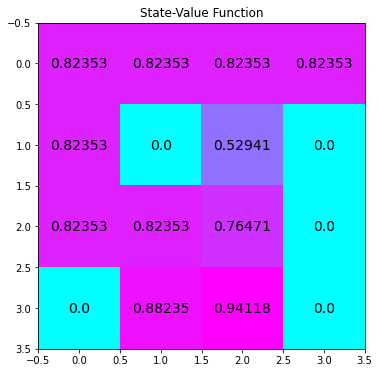

In [13]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi)

### Part 5: Truncated Policy Iteration

In this section, we will implementation the truncated policy iteration.  

We will begin by implementing truncated policy evaluation. Our algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

In [14]:
def truncated_policy_evaluation(env, policy, V, max_it=1, gamma=1):
    num_it=0
    while num_it < max_it:
        for s in range(env.nS):
            v = 0
            q = q_from_v(env, V, s, gamma)
            for a, action_prob in enumerate(policy[s]):
                v += action_prob * q[a]
            V[s] = v
        num_it += 1
    return V

Next, we will implement truncated policy iteration.  Our algorithm should accept five arguments as **input**:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `max_it`: This is a positive integer that corresponds to the number of sweeps through the state space (default value: `1`).
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

In [15]:
def truncated_policy_iteration(env, max_it=1, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    policy = np.zeros([env.nS, env.nA]) / env.nA
    while True:
        policy = policy_improvement(env, V)
        old_V = copy.copy(V)
        V = truncated_policy_evaluation(env, policy, V, max_it, gamma)
        if max(abs(V-old_V)) < theta:
            break;
    return policy, V

Run the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.

Play with the value of the `max_it` argument.  Do you always end with the optimal state-value function?


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



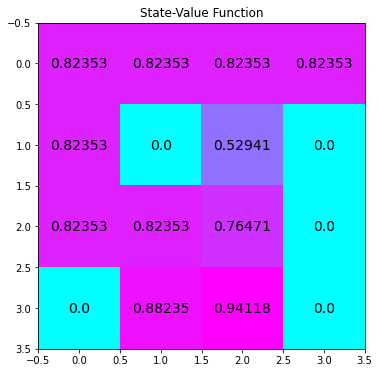

In [16]:
policy_tpi, V_tpi = truncated_policy_iteration(env, max_it=2)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_tpi,"\n")

# plot the optimal state-value function
plot_values(V_tpi)

### Part 6: Value Iteration

In this section, we will write your own implementation of value iteration.

Our algorithm should accept three arguments as input:
- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used for the stopping criterion (default value: `1e-8`).

The algorithm returns as **output**:
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s`.

In [17]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))
            delta = max(delta,abs(V[s]-v))
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)
    return policy, V

Use the next code cell to solve the MDP and visualize the output.  The state-value function has been reshaped to match the shape of the gridworld.


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



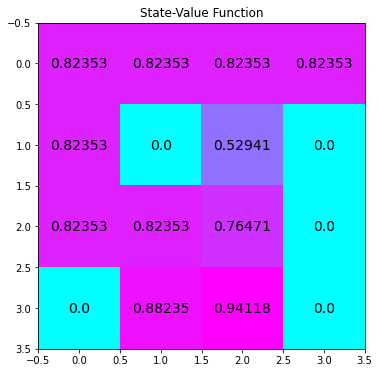

In [18]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values(V_vi)